# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !


    1. Input tweet
    Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
    1. Tokenized tweet
    Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com

    2. Input tweet
    Its american tradition bitch
    2. Tokenized tweet
    Its , american , tradition , bitch
    
    3. Input tweet
    @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
    3. Tokenized tweet
    @ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I , 'm , sure , I , hear , a , tiny , squeak , ... , Then , louder , ones

    4. Input tweet
    " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
    4. Tokenized tweet
    " , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , <--- , " , " , I , tweet , because , I , 'm , happy , , , I , tweet , because , I , 'm , free , " , " , LOL , ! , "
    
    5. Input tweet
    Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
    5. Tokenized tweet
    Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match  , your , tacky , beach , gear , : , Sammy , 's , done , it , aga.. , http://tinyurl.com/lb5p6m

    6. Input tweet
    @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
    6. Tokenized tweet
    @dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it , 's , kinda , cool , when , u , get , up , to , speed , .
    
    7. Input tweet
    iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
    7. Tokenized tweet
    iPhone , activation , delays , continue , , , Apple , offers , $30 , http://twt.gs/l3Ki

    8. Input tweet
    RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
    8. Tokenized tweet
    RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 25MB , http://bit.ly/62mjw , Nice , ! , ! , !
    
    9. Input tweet
    RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
    9. Tokenized tweet
    RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing's , Sales , / , Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI

    10. Input tweet
    Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
    10. Tokenized tweet
    Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)

    11. Input tweet
    Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
    11. Tokenized tweet
    Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland

    12. Input tweet
    @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
    12. Tokenized tweet
    @mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can't , do , both
    
    13. Input tweet
    Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
    13. Tokenized tweet
    Incoming , : , Frightened , Rabbit , , , Sept , . , 22 , ( , Tucson , ) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot.. , http://tinyurl.com/nz6xcv

    14. Input tweet
    Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
    14. Tokenized tweet
    Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2YyQ , )
    
    15. Input tweet
    Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
    15. Tokenized tweet
    Ik , weet , niet , wie , er , achter , de , T-Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik , ... , Best , vreemd , eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [2]:
from typing import List, Dict, Tuple
from collections import Counter, defaultdict

class BPETokenizer:
    def __init__(self, vocab_size: int) -> None:
        self.vocab_size = vocab_size
        self.vocab = {}
        self.merges = []

    def get_stats(self, word_counts: Dict[str, int]) -> Dict[Tuple[str, str], int]:
        """Calculate the frequency of each pair of symbols/tokens."""
        pairs = defaultdict(int)
        for word, freq in word_counts.items():
            symbols = word.split()
            for i in range(len(symbols) - 1):
                pairs[symbols[i], symbols[i + 1]] += freq
        return pairs

    def merge_vocab(self, pair: Tuple[str, str], word_counts: Dict[str, int]) -> Dict[str, int]:
        """Merge the most frequent pair in the vocabulary."""
        new_word_counts = {}
        bigram = ' '.join(pair)
        replacer = ''.join(pair)
        for word in word_counts:
            new_word = word.replace(bigram, replacer)
            new_word_counts[new_word] = word_counts[word]
        return new_word_counts

    def train(self, corpus: List[str]) -> None:
        """Learn merges and build the vocabulary from the corpus."""
        # Initialize word count
        word_counts = Counter(" ".join(word) for word in corpus)  # Split words into characters

        # Training loop
        for _ in range(self.vocab_size - len(self.vocab)):
            pairs = self.get_stats(word_counts)
            if not pairs:
                break
            best_pair = max(pairs, key=pairs.get)
            if pairs[best_pair] < 2:
                # Stop if the most frequent pair is not frequent enough
                break
            word_counts = self.merge_vocab(best_pair, word_counts)
            self.merges.append(best_pair)
            self.vocab[''.join(best_pair)] = pairs[best_pair]

        # Add single characters to the vocab
        for word in corpus:
            for char in word:
                if char not in self.vocab:
                    self.vocab[char] = 1

    def tokenize(self, text: str) -> List[str]:
        """Tokenize the text according to the learned merges."""
        text = " ".join(text)  # Start by splitting into characters
        for merge in self.merges:
            bigram = ' '.join(merge)
            replacement = ''.join(merge)
            text = text.replace(bigram, replacement)
        return text.split()

corpus = [
    "this is a test",
    "this is another test",
    "test the tokenizer",
]
vocab_size = 50
tokenizer = BPETokenizer(vocab_size=vocab_size)
tokenizer.train(corpus)
tokenized_text = tokenizer.tokenize("this is a test of the tokenizer")
print(tokenized_text)

['this', 'is', 'a', 'test', 'o', 'f', 'th', 'e', 't', 'o', 'k', 'e', 'n', 'i', 'z', 'e', 'r']


### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [3]:
import pandas as pd

def read_tweets_from_files(file_paths):
    tweets = []
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as file:
            tweets.extend(file.readlines())
    return tweets

file_paths = ['data/file1', 'data/file2', 'data/file3', 'data/file4', 'data/file5']
tweets = read_tweets_from_files(file_paths)


c:\Users\Dasha\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Dasha\miniconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\Dasha\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
vocab_sizes = [ 250, 500, 750, 1000]
tokenizers = {size: BPETokenizer(vocab_size=size) for size in vocab_sizes}

for size, tokenizer in tokenizers.items():
    tokenizer.train(tweets)


In [5]:
def average_tokenized_length(tokenizer, texts):
    lengths = [len(tokenizer.tokenize(text)) for text in texts]
    return sum(lengths) / len(lengths)

average_lengths = {size: average_tokenized_length(tokenizer, tweets) for size, tokenizer in tokenizers.items()}


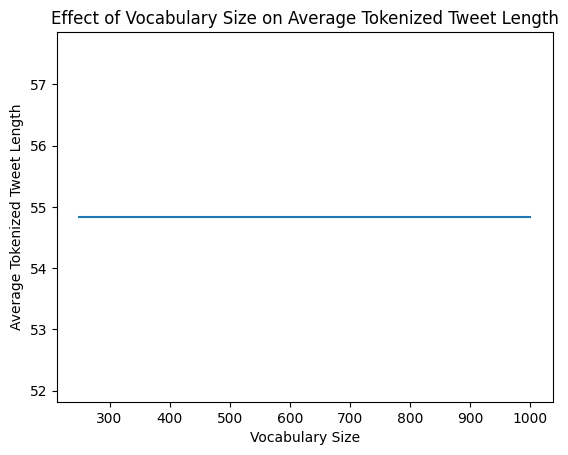

In [6]:
import matplotlib.pyplot as plt

plt.plot(list(average_lengths.keys()), list(average_lengths.values()))
plt.xlabel('Vocabulary Size')
plt.ylabel('Average Tokenized Tweet Length')
plt.title('Effect of Vocabulary Size on Average Tokenized Tweet Length')
plt.show()


### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

In [ ]:
# Your code here